In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

import src.utils as utils
import src.gl_models as gl

t = np.arange(64)/(4*100)
x = np.cos(2*np.pi*10*t) + 0.5*np.cos(2*np.pi*100*t)

plt.figure()
ax = plt.gca()
ax.plot(t,x)
ax.set_xlabel('t')
ax.set_ylabel('x(t)')

ModuleNotFoundError: No module named 'src.tools'

# iters:  85  Rel primal:  8.61817639996588e-06  Rel dual:  4.165507788070547e-06  OBJ:  [[40.00280384]] 

Time needed is  0.012001752853393555  seconds



Text(0.5, 1.0, 'Learned adjacency matrix from x(t)')

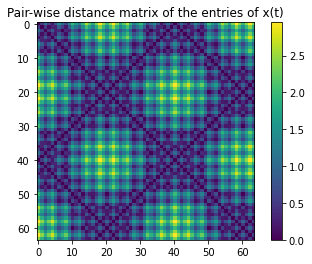

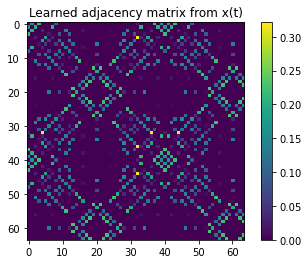

In [4]:
m = x.size
X = np.reshape(x,(m,1))
z = pdist(X, 'euclidean') # distance matrix condensed form
#z = pdist(X, 'chebyshev')
Z = squareform(z) # turns the condensed form into a 4 by 4 distance matrix
    #Z = coo_matrix(Z)

plt.figure()
ax0 = plt.gca()
img = ax0.imshow(Z)
plt.colorbar(img, ax = ax0)
ax0.set_title('Pair-wise distance matrix of the entries of x(t)')


params = {}
#params['w_0'] = np.zeros((m,m))
#params['c'] = 1
params['fix_zeros'] = True
params['edge_mask'] = np.zeros((m,m)) #np.reshape(np.array([1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0]),(16,1))
params['edge_mask'][Z>0.5] = 1
#params['verbosity'] = 3
#params['nargout'] = 1 

nargout = 1
a = 1
b = 1

W = gl.gsp_learn_graph_log_degrees(Z,a,b,params)
W[W<1e-5] = 0
plt.figure()
ax0 = plt.gca()
img = ax0.imshow(W.toarray())
plt.colorbar(img, ax=ax0)
ax0.set_title('Learned adjacency matrix from x(t)')

#ax.imshow(W)